### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 2. Centrality Measures

# Lecture 9: Degree and Eigenvector Centrality

Key actors in a social network can be identified through centrality measures. The question of what it means to be central has a number of different answers. Accordingly, in the context of social network analysis, a variety of different centrality measures have been developed.

Here we introduce, in addition to the **degree centrality** we have already seen, three more further measures:

* **eigenvector centrality**, defined in terms of properties of the network’s adjacency matrix,

* **closeness centrality**, defined in terms of a nodes distance to other nodes on the network,

* **betweenness centrality**, defined in terms of shortest paths.


Start by importing the necessary
python libraries into this jupyter notebook.  (Actually, `networkx` works with a number of useful
`python` libraries, some of which are loaded automatically, while others have to be `import`ed explicitly,
depending on the circumstances.  In the following, we will also make explicit use of `Pandas` and `Numpy`.)

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
opts = { "with_labels": True, "node_color": 'y'}

### Degree Centrality

The **degree** of a node is its number of neighbors in the graph.
This number can serve as a simple measure of centrality.

Consider the following network of **florentine families**, 
linked by **marital ties**.

In [2]:
G = nx.florentine_families_graph()
list(G.nodes())

['Acciaiuoli',
 'Medici',
 'Castellani',
 'Peruzzi',
 'Strozzi',
 'Barbadori',
 'Ridolfi',
 'Tornabuoni',
 'Albizzi',
 'Salviati',
 'Pazzi',
 'Bischeri',
 'Guadagni',
 'Ginori',
 'Lamberteschi']

Unfortunately, this version of the graph misses the isolated node `'Pucci'` of the original graph.  Let's just add it and draw the resulting graph.

In [3]:
cc = list(G.nodes())
G.add_node('Pucci')

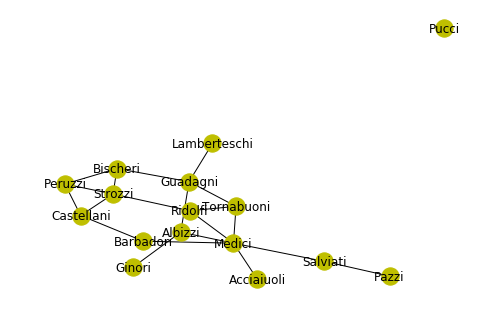

In [4]:
nx.draw(G, **opts)

The large connected component can be constructed and drawn as a subgraph.  Let's call it `GG`.

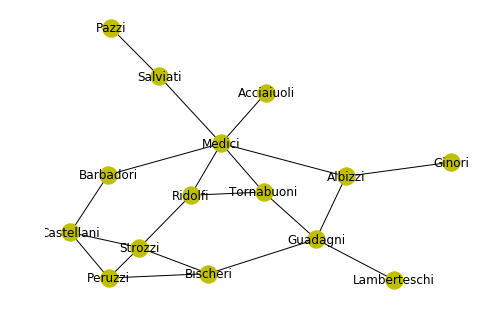

In [5]:
GG = G.subgraph(cc)
nx.draw(GG, **opts)

Known indicators of the importance of these families are their **wealth**, and the number of seats
on the city council (**priorates**).  These measures can be compared with the node degree in the graph `G`. 

In [6]:
wealth = {
  'Acciaiuoli': 10, 'Albizzi': 36, 'Barbadori': 55, 'Bischeri': 44,
  'Castellani': 20, 'Ginori': 32, 'Guadagni': 8, 'Lamberteschi': 42,
  'Medici': 103, 'Pazzi': 48, 'Peruzzi': 49, 'Pucci': 3,
  'Ridolfi': 27, 'Salviati': 10, 'Strozzi': 146, 'Tornabuoni': 48,
}

priorates = {
  'Acciaiuoli': 53, 'Albizzi': 65, 'Barbadori': 'n/a', 'Bischeri': 12,
  'Castellani': 22, 'Ginori': 'n/a', 'Guadagni': 21, 'Lamberteschi': 0,
  'Medici': 53, 'Pazzi': 'n/a', 'Peruzzi': 42, 'Pucci': 0,
  'Ridolfi': 38, 'Salviati': 35, 'Strozzi': 74, 'Tornabuoni': 'n/a',
}

In [7]:
nx.set_node_attributes(G, wealth, 'wealth')
nx.set_node_attributes(G, priorates, 'priorates')
nx.set_node_attributes(G, dict(G.degree()), 'degree')

In [8]:
dict(G.degree())

{'Acciaiuoli': 1,
 'Medici': 6,
 'Castellani': 3,
 'Peruzzi': 3,
 'Strozzi': 4,
 'Barbadori': 2,
 'Ridolfi': 3,
 'Tornabuoni': 3,
 'Albizzi': 3,
 'Salviati': 2,
 'Pazzi': 1,
 'Bischeri': 3,
 'Guadagni': 4,
 'Ginori': 1,
 'Lamberteschi': 1,
 'Pucci': 0}

In [9]:
G.nodes['Pazzi']

{'wealth': 48, 'priorates': 'n/a', 'degree': 1}

In [10]:
G.nodes(data=True)

NodeDataView({'Acciaiuoli': {'wealth': 10, 'priorates': 53, 'degree': 1}, 'Medici': {'wealth': 103, 'priorates': 53, 'degree': 6}, 'Castellani': {'wealth': 20, 'priorates': 22, 'degree': 3}, 'Peruzzi': {'wealth': 49, 'priorates': 42, 'degree': 3}, 'Strozzi': {'wealth': 146, 'priorates': 74, 'degree': 4}, 'Barbadori': {'wealth': 55, 'priorates': 'n/a', 'degree': 2}, 'Ridolfi': {'wealth': 27, 'priorates': 38, 'degree': 3}, 'Tornabuoni': {'wealth': 48, 'priorates': 'n/a', 'degree': 3}, 'Albizzi': {'wealth': 36, 'priorates': 65, 'degree': 3}, 'Salviati': {'wealth': 10, 'priorates': 35, 'degree': 2}, 'Pazzi': {'wealth': 48, 'priorates': 'n/a', 'degree': 1}, 'Bischeri': {'wealth': 44, 'priorates': 12, 'degree': 3}, 'Guadagni': {'wealth': 8, 'priorates': 21, 'degree': 4}, 'Ginori': {'wealth': 32, 'priorates': 'n/a', 'degree': 1}, 'Lamberteschi': {'wealth': 42, 'priorates': 0, 'degree': 1}, 'Pucci': {'wealth': 3, 'priorates': 0, 'degree': 0}})

In [11]:
pd.DataFrame.from_dict(
    dict(G.nodes(data=True)), 
    orient='index'
).sort_values('degree', ascending=False)

,wealth,priorates,degree
Medici,103,53,6
Strozzi,146,74,4
Guadagni,8,21,4
Castellani,20,22,3
Peruzzi,49,42,3
Ridolfi,27,38,3
Tornabuoni,48,n/a,3
Albizzi,36,65,3
Bischeri,44,12,3
Barbadori,55,n/a,2


<div class="alert alert-danger">
    
<b>Definition (Degree Centrality).</b>
In a (simple) graph $G = (X, E)$, with $X = \{1, \dots, n\}$ and 
adjacency matrix $A = (a_{ij})$,
the <b>degree centrality</b> $c_i^D$ of node $i \in X$ is defined as
$$
c_i^D = k_i = \sum_j a_{ij},
$$
where $k_i$ is the degree of node $i$.<br />    
The <b>normalized degree centrality</b> $C_i^D$ of node $i \in X$ is defined as
$$
C_i^D = \frac{k_i}{n-1} = \frac{c_i^D}{n-1},
$$
the degree centrality of node $i$ divided by its potential number of
neighbors in the graph.
</div>

In a directed graph one distinguishes between the **in-degree** and the **out-degree**
of a node and defines the **in-degree centrality** and the **out-degree centrality** accordingly.

In [12]:
nx.set_node_attributes(G, nx.degree_centrality(G), '$C_i^D$')

In [13]:
pd.DataFrame.from_dict(
    dict(G.nodes(data=True)), 
    orient='index'
).sort_values('degree', ascending=False)

,wealth,priorates,degree,$C_i^D$
Medici,103,53,6,0.400000
Strozzi,146,74,4,0.266667
Guadagni,8,21,4,0.266667
Castellani,20,22,3,0.200000
Peruzzi,49,42,3,0.200000
Ridolfi,27,38,3,0.200000
Tornabuoni,48,n/a,3,0.200000
Albizzi,36,65,3,0.200000
Bischeri,44,12,3,0.200000
Barbadori,55,n/a,2,0.133333


### Eigenvectors and Centrality

Recall that a ($n$-dimensional) vector $v$ is called an **eigenvector**
of a square ($n \times n$)-matrix $A$, if 
$$
 A v = \lambda v
$$
for some scalar (number) $\lambda$ (which is then called an **eigenvalue** of the matrix $A$)

The basic idea of eigenvector centrality is that a node's ranking in a network should
relate to the rankings of the nodes it is connected to.  More specifically, up to some scalar $\lambda$,
the centrality $c_i^E$ of node $i$ should be equal to the sum if the centralities $c_j^E$ of its 
neighbor nodes $j$.  In terms of the adjacency matrix $A = (a_{ij})$, this relationship is expressed as
$$
\lambda c_i^E = \sum_j a_{ij} c_j^E,
$$
which in turn, in matrix language is
$$
\lambda c^E = A c_E,
$$
for the vector $c^E = (c_i^E)$, which then is an eigenvector of $A$.

How to find $c^E$? Or $\lambda$?  Linear Algebra: 
1. Find the *characteristic polynomial* $p_A(x)$ of $A$
(as *determinant* of the matrix $x I - A$, where $I$ is the $n \times n$-identity matrix);
2. Find the *roots* $\lambda$ of $p_A(x)$ 
(i.e. scalars $\lambda$ such that $p_A(\lambda) = 0$;
3. Find a *nontrivial solution* of the linear system
$(\lambda I - A)c = 0$ (where $0$ stands for an all-$0$ column vector,
and $c = (c_1, \dots, c_n)$ is a column of *unknowns*).

In [14]:
A = nx.adjacency_matrix(G).todense()

In `numpy`, the function `poly` finds the characteristic polynomial of a matrix, for example of the $2\times2$ matrix
$$
B = \left(
\begin{array}{cc}
  2 & 2 \\
  3 & 1
\end{array}
\right)
$$

In [15]:
B = np.array([[2,2],[3,1]])
poly = np.poly(B)

In [16]:
print(poly)

[ 1. -3. -4.]


Thus $p_B(x) = x^2 - 3x - 4$.

The eigenvalues and eigenvectors of $B$ are found by `np.linalg.eig`:

In [17]:
l, v = np.linalg.eig(B)
vv = v.transpose()

2 Eigenvalues:

In [18]:
print(l); 

[ 4. -1.]


and 2 eigenvectors (the rows of this matrix):

In [19]:
print (vv);

[[ 0.70710678  0.70710678]
 [-0.5547002   0.83205029]]


Check: does $B \cdot v_0 = l_0\, v_0$?

In [20]:
print(l[0]*vv[0])

[2.82842712 2.82842712]


In [21]:
print(np.matmul(B, vv[0]))

[2.82842712 2.82842712]


Now for the bigger matrix:

In [22]:
print(A)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


Find its characteristic polynomial ...

In [23]:
np.poly(A)

array([ 1.00000000e+00, -4.21884749e-15, -2.00000000e+01, -6.00000000e+00,
        1.39000000e+02,  6.80000000e+01, -4.17000000e+02, -2.42000000e+02,
        5.65000000e+02,  3.44000000e+02, -3.44000000e+02, -2.08000000e+02,
        8.20000000e+01,  4.60000000e+01, -5.00000000e+00, -2.00000000e+00,
        0.00000000e+00])

... and its eigenvalues ...???

**Numerical Linerar Algebra:**  forget algebraic precision, use the **Power method**:

1. start with $u = (1, 1, \dots, 1)$, say;
2. keep replacing $u \gets Au$ until $u/\|u\|$ becomes stable ...

If $A$ has a *dominant* eigenvalue $\lambda_0$ then $u$ will *converge*
to an eigenvector for the eigenvalue $\lambda_0$.

Restore the matrix $A$:

In [24]:
A = nx.adjacency_matrix(G)

Provide an all-$1$ vector $u$ and normalize it:

In [25]:
u = [1 for x in A]
print(u)
print(u/np.linalg.norm(u))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25]


Multiply by $A$:

In [26]:
v = A * u
print(v)
print(v/np.linalg.norm(v))

[1 6 3 3 4 2 3 3 3 2 1 3 4 1 1 0]
[0.08638684 0.51832106 0.25916053 0.25916053 0.34554737 0.17277369
 0.25916053 0.25916053 0.25916053 0.17277369 0.08638684 0.25916053
 0.34554737 0.08638684 0.08638684 0.        ]


Repeat this a couple of times.

In [27]:
for i in range(40):
    u = A * u
    u = u/np.linalg.norm(u)

Now, $u$ should have stabilized and a further multiplication by $A$ should be the same as multiplying $u$ with the eigenvalue $l$.

So $l$ can be found as the quotient of two corresponding vector
entries

In [28]:
v = A * u
l = v[2]/u[2]
print("l = ", l)

l =  3.2561754813946275


And the stability of $u$ can be tested by computing the
norm of the difference of $u$ and the normalized version of the vector $v = A \cdot u$.

In [29]:
v = v/np.linalg.norm(v)
print("||v - u|| = ", np.linalg.norm(v - u))


||v - u|| =  0.0001380299403227346


The function `np.linalg.eig` does all of this and more.
It finds **all** eigenvalues of the adjaceny matrix $A$,
and a list `w` of eigenvectors.

The first eigenvalue in the list `l` below should be the one
that the power method discovered.

The entries in the corresponding eigenvector
are then the eigenvector centralities of the nodes in the graph.

In [30]:
l, w = np.linalg.eig(A.todense())
print (l)
print (w.transpose()[0])

[ 3.25610375  2.42381396 -2.69583872  1.70899078 -2.06786891 -1.87072241
  1.05403772  0.93839893  0.60199089  0.25781512 -0.20243481 -1.19329397
 -0.57626063 -0.76538496 -0.86934672  0.        ]
[[0.13215429 0.43030809 0.25902617 0.27573037 0.35598045 0.21170525
  0.34155264 0.3258423  0.24395611 0.1459172  0.04481344 0.28280009
  0.2891156  0.07492271 0.08879189 0.        ]]


The `networkx` package computes them as follows:

In [31]:
eigen_cen = nx.eigenvector_centrality(G)
eigen_cen

{'Acciaiuoli': 0.13215731952853418,
 'Medici': 0.4303154258349922,
 'Castellani': 0.2590200378423514,
 'Peruzzi': 0.2757224374104833,
 'Strozzi': 0.355973032646045,
 'Barbadori': 0.21170574706479847,
 'Ridolfi': 0.34155442590743645,
 'Tornabuoni': 0.32584670416957395,
 'Albizzi': 0.24396052967544765,
 'Salviati': 0.1459208416417183,
 'Pazzi': 0.04481493970386308,
 'Bischeri': 0.2827943958713356,
 'Guadagni': 0.2891171573226501,
 'Ginori': 0.0749245316027793,
 'Lamberteschi': 0.08879253113499551,
 'Pucci': 1.5210930780184965e-24}

The theoretical foundation for this approach is provided by the
following Linear Algebra [theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem) from 1907/1912.

<div class="alert alert-warning">
<b>Theorem.</b> (Perron-Frobenius for irreducible matrices.)
Suppose that $A$ is a square, nonnegative, irreducible matrix. Then:

* $A$ has a real eigenvalue $\lambda > 0$ with $\lambda \geq |\lambda'|$ for all
eigenvalues $\lambda'$ of $A$;
* $\lambda$ is a simple root of the characteristic polynomial of $A$;
* there is a $\lambda$-eigenvector $v$ with $v > 0$.
</div>

Here, a matrix $A$ is called **reducible** if, for some simultaneous
permutation of its rows and columns, it has the block form
$$
A = \left( 
\begin{array}{cc}
A_{11} & A_{12} \\
0 & A_{22}
\end{array}
\right).
$$
And $A$ is **irreducible** if it is not reducible.

The incidence matrix of a simple graph $G$ is irreducible if and only if $G$ is connected.

<div class="alert alert-success">

**Example.** Recall that
$$
\left(
\begin{array}{cc}
3 & 1 \\ 2 & 2
\end{array}
\right)
\, 
\left(
\begin{array}{c}
1 \\ 1
\end{array}
\right)
= 
\left(
\begin{array}{c}
4 \\ 4
\end{array}
\right)
=
4 \,
\left(
\begin{array}{c}
1 \\ 1
\end{array}
\right),
$$
making the vector $(^1_1)$ an **eigenvector** for the **eigenvalue**
$\lambda = 4$ of the matrix $A$.

In this example
* all entries $a_{ij}$ of  the matrix $A = (a_{ij})$ are positive;
* the eigenvalue $4$ is strictly larger than the magnitude $|\lambda'|$ of all the other (complex or real) eigenvalues of
$A$ (here, $\lambda' = -1$);
* and the eigenvalue $\lambda = 4$ has an eigenvector with
all its entries positive.
</div>
    
The Perron-Frobenius Theorem states that the above observations are **no
coincidence**.

<div class="alert alert-danger">

**Definition (Eigenvector centrality).**  In a simple, connected graph $G$,
the **eigenvector centrality** $c_i^E$ of node $i$ is defined as
$$
c_i^E = u_i,
$$
where $u = (u_1, \dots, u_n)$ is the (unique) normalized eigenvector
of the adjacency matrix $A$ of $G$
with eigenvalue $\lambda$, and where $\lambda > |\lambda'|$
for all eigenvalues $\lambda'$ of $A$.

The **normalised eigenvector centrality** of node $i$ is defined as
$$
C_i^E = \frac{c_i^E}{C^E},
$$
where $C^E = \sum_j c_j^E$.

</div>

Let's attach the eigenvector centralities as node attributes
and display the resulting table.

In [32]:
eigen_cen = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigen_cen, '$c_i^E$')

In [33]:
pd.DataFrame.from_dict(
    dict(G.nodes(data=True)), 
    orient='index'
).sort_values('degree', ascending=False)

,wealth,priorates,degree,$C_i^D$,$c_i^E$
Medici,103,53,6,0.400000,4.303154e-01
Strozzi,146,74,4,0.266667,3.559730e-01
Guadagni,8,21,4,0.266667,2.891172e-01
Castellani,20,22,3,0.200000,2.590200e-01
Peruzzi,49,42,3,0.200000,2.757224e-01
Ridolfi,27,38,3,0.200000,3.415544e-01
Tornabuoni,48,n/a,3,0.200000,3.258467e-01
Albizzi,36,65,3,0.200000,2.439605e-01
Bischeri,44,12,3,0.200000,2.827944e-01
Barbadori,55,n/a,2,0.133333,2.117057e-01


Save the graph and its attributes for future use.

In [34]:
nx.write_yaml(G, "data/florentine.yml")

## Code Corner

### `numpy`

* `poly`: [[doc]](https://numpy.org/doc/1.18/reference/generated/numpy.poly.html)


* `matmul`: [[doc]](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html)


* `linalg.eig`: [[doc]](https://numpy.org/doc/1.18/reference/generated/numpy.linalg.eig.html)


* `linalg.norm`: [[doc]](https://numpy.org/doc/1.18/reference/generated/numpy.linalg.norm.html)

### `pandas`

* `DataFrame.from_dict`: [[doc]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html)

### `networkx`

* `florentine_families_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generators.html#module-networkx.generators.social)
the marital links between powerful families in 15th century Florence
(excluding the isolated Pucci family).


* `set_node_attributes`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html)
set a named attribute for several/all nodes in a graph.


* `degree_centrality`: [[doc]](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html)



* `eigenvector_centrality`: [[doc]](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html)


* `write_yaml`: [[doc]](https://networkx.github.io/documentation/stable/reference/readwrite/yaml.html)
store a graph on file in YAML format.

##  Exercises

1.  Apply the power method to the $2 \times 2$ matrix
$$
  B = \left(\begin{array}{cc}
  2 & 2 \\
  3 & 1
  \end{array}\right)
$$
from above.  Which eigenvalue and which eigenvector can be found in this way?

1.  Compute the characteristic polynomial and the eigenvalues of the matrix
$$
M = \left(\begin{array}{cccc}
0&0&1&0\\0&0&1&0\\0&0&0&1\\1&1&0&0
\end{array}\right).
$$

3. Determine the degree centrality and the eigenvector centrality of the nodes in some
   random trees.  What do you observe?
   
3. Compute the eigenvector and degree centralities of the nodes of the Petersen graph.
   What do you observe?